In [1]:
!ls "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)"

'checkpoint_3_vbss+vbou+vbuc+vbss=0.4954.pt'   metadata.json   metrics_logs.csv


In [30]:
!ls "/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)"

'vindrcxr_metrics(bbox_regression,3000,opt_thr(0.05,0.70),use_classifier_confs).pkl'
'vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl'


In [1]:
from importlib import reload
import medvqa

In [248]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [249]:
reload(medvqa.datasets.vinbig)

<module 'medvqa.datasets.vinbig' from '/home/pamessina/medvqa/medvqa/datasets/vinbig/__init__.py'>

In [94]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metric_bars_per_method, generate_color_variants, _COLORS
from medvqa.utils.common import DictWithDefault
from medvqa.utils.constants import VINBIG_LABELS
from medvqa.datasets.vinbig import compute_label_frequencies, load_labels
import numpy as np

In [3]:
label_frequencies_normal = compute_label_frequencies()
label_frequencies_modif = compute_label_frequencies(improve_labels=True)

NOTE: Improving VinDr-CXR classification labels ...


# 1) VinDr-CXR test set: bar chart with AUPRC per class, Uniformer

In [383]:
method_dicts = []
method_aliases = []
metric_names = VINBIG_LABELS[:]
metric_names.remove('Edema')

In [384]:
metric_aliases = [f'{x} (tr:{label_frequencies_normal["train"][x]}, ts:{label_frequencies_normal["test"][x]})' for x in metric_names]
class_name = 'Lung Opacity'
class_idx = metric_names.index(class_name)
a = label_frequencies_normal["train"][class_name]
b = label_frequencies_normal["test"][class_name]
c = label_frequencies_modif["train"][class_name]
d = label_frequencies_modif["test"][class_name]
metric_aliases[class_idx] = f'{class_name} (tr:{a}({c}), ts:{b}({d}))'

metric_aliases

['Aortic enlargement (tr:3098, ts:220)',
 'Atelectasis (tr:187, ts:86)',
 'Calcification (tr:458, ts:194)',
 'Cardiomegaly (tr:2316, ts:309)',
 'Clavicle fracture (tr:27, ts:2)',
 'Consolidation (tr:353, ts:96)',
 'Emphysema (tr:81, ts:3)',
 'Enlarged PA (tr:131, ts:8)',
 'ILD (tr:397, ts:221)',
 'Infiltration (tr:613, ts:58)',
 'Lung Opacity (tr:1331(2709), ts:84(614))',
 'Lung cavity (tr:51, ts:9)',
 'Lung cyst (tr:33, ts:2)',
 'Mediastinal shift (tr:150, ts:20)',
 'Nodule/Mass (tr:841, ts:176)',
 'Pleural effusion (tr:1038, ts:111)',
 'Pleural thickening (tr:2010, ts:169)',
 'Pneumothorax (tr:96, ts:18)',
 'Pulmonary fibrosis (tr:1621, ts:217)',
 'Rib fracture (tr:90, ts:11)',
 'Other lesion (tr:1154, ts:94)',
 'COPD (tr:36, ts:2)',
 'Lung tumor (tr:291, ts:80)',
 'Pneumonia (tr:919, ts:246)',
 'Tuberculosis (tr:750, ts:164)',
 'Other disease (tr:4377, ts:657)',
 'No finding (tr:10478, ts:2051)']

#### aehrc-cxrmate-rrg24-uniformer + random fact embeddings + FiLM Attention Pooling + BBox + MLP; VinDr-CXR

In [385]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [386]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+random_fact_emb+FiLM-att+Bbox+MLP; VinDr-CXR')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,rand-fact); trained on V')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; VinDr-CXR modified

In [387]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [388]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+Bbox+MLP; VinDr-CXR modif')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on Vm')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [389]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths'])

In [390]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+Bbox+MLP; MIMIC-CXR (pos-neg-facts + GPT-4 labels)')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [391]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.30),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [392]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+Bbox+MLP; MIMIC-CXR (pos-neg-facts+GPT-4 labels)+VinDr-CXR modif')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M+Vm')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [393]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.30),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [394]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+Bbox+MLP; MIMIC-CXR+VinDr-CXR modif -> VinDr-CXR modif')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M+Vm -> Vm')

#### Random

In [352]:
from medvqa.evaluation.bootstrapping import stratified_multilabel_bootstrap_metrics
from medvqa.metrics.classification.prc_auc import prc_auc_score

In [353]:
train_image_id_2_labels, test_image_id_2_labels = load_labels(improve_labels=True)

NOTE: Improving VinDr-CXR classification labels ...


In [354]:
test_labels = np.array([x for x in test_image_id_2_labels.values()])
test_labels = np.delete(test_labels, VINBIG_LABELS.index('Edema'), axis=1)
print(test_labels.shape)
random_probs = np.random.rand(*test_labels.shape)
print(random_probs.shape)

(3000, 27)
(3000, 27)


In [355]:
random_metrics = stratified_multilabel_bootstrap_metrics(test_labels, random_probs, prc_auc_score)

Bootstrapping: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 38.07it/s]


In [395]:
method_dict = {}
for label_name, mean, std in zip(metric_names, random_metrics['mean_per_class'], random_metrics['std_per_class']):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('Random')

### Plot

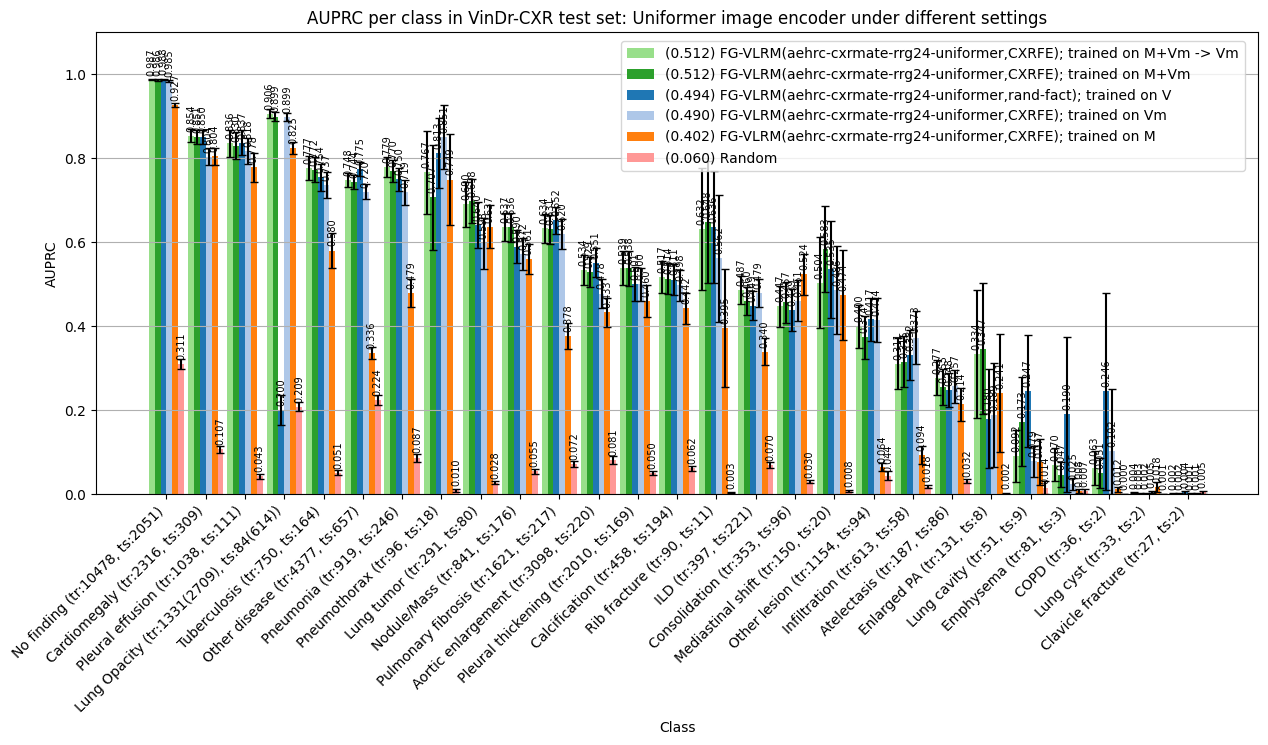

In [396]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC per class in VinDr-CXR test set: Uniformer image encoder under different settings',
    vertical=True,
    show_std=True,
    xtick_rotation=45,
    bbox_to_anchor=(0.72, 0.7),
    figsize=(15, 6),
    xlabel='Class',
    ylabel='AUPRC',
    ylim=[0, 1.1],
)

# 2) VinDr-CXR test set: bar chart with AUPRC per class, Uniformer vs. RadDINO-MAIRA-2 vs. ConvNeXT

In [219]:
method_dicts = []
method_aliases = []
metric_names = VINBIG_LABELS[:]
metric_names.remove('Edema')

In [220]:
metric_aliases = [f'{x} (tr:{label_frequencies_normal["train"][x]}, ts:{label_frequencies_normal["test"][x]})' for x in metric_names]
class_name = 'Lung Opacity'
class_idx = metric_names.index(class_name)
# a = label_frequencies_normal["train"][class_name]
# b = label_frequencies_normal["test"][class_name]
a = label_frequencies_modif["train"][class_name]
b = label_frequencies_modif["test"][class_name]
# metric_aliases[class_idx] = f'{class_name} (tr:{a}({c}), ts:{b}({d}))'
metric_aliases[class_idx] = f'{class_name} (tr:{a}, ts:{b})'

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [221]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.30),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [222]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(Uniformer,CXRFE); trained on M+V$_\mathrm{m}$ → V$_\mathrm{m}$')

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP; VinDr-CXR modified

In [223]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.10),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [224]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(RAD-DINO-MAIRA-2,CXRFE); trained on V$_\mathrm{m}$')

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [225]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl')
tmp.keys()

dict_keys(['classification', 'image_paths', 'bbox_regression', 'best_iou_threshold', 'best_conf_threshold'])

In [226]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(ConvNeXT-small,CXRFE); trained on M+V$_\mathrm{m}$ → V$_\mathrm{m}$')

#### Random

In [227]:
from medvqa.evaluation.bootstrapping import stratified_multilabel_bootstrap_metrics
from medvqa.metrics.classification.prc_auc import prc_auc_score

In [228]:
train_image_id_2_labels, test_image_id_2_labels = load_labels(improve_labels=True)

NOTE: Improving VinDr-CXR classification labels ...


In [229]:
test_labels = np.array([x for x in test_image_id_2_labels.values()])
test_labels = np.delete(test_labels, VINBIG_LABELS.index('Edema'), axis=1)
print(test_labels.shape)
random_probs = np.random.rand(*test_labels.shape)
print(random_probs.shape)

(3000, 27)
(3000, 27)


In [230]:
random_metrics = stratified_multilabel_bootstrap_metrics(test_labels, random_probs, prc_auc_score)

Bootstrapping: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 38.61it/s]


In [371]:
method_dict = {}
for label_name, mean, std in zip(metric_names, random_metrics['mean_per_class'], random_metrics['std_per_class']):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('Random')

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/auprc_per_class_vindrcxr(modified)_test_set.pdf


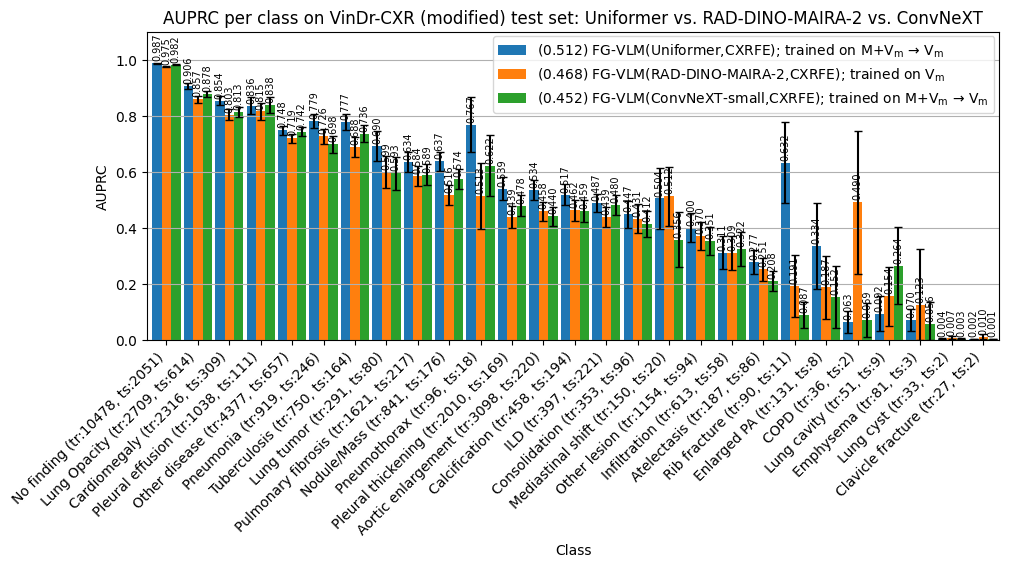

In [250]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC per class on VinDr-CXR (modified) test set: Uniformer vs. RAD-DINO-MAIRA-2 vs. ConvNeXT',
    vertical=True,
    show_std=True,
    xtick_rotation=45,
    bbox_to_anchor=(0.70, 0.735),
    figsize=(11, 4),
    xlabel='Class',
    ylabel='AUPRC',
    ylim=[0, 1.1],
    xlim=[0.025, 1.03],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/auprc_per_class_vindrcxr(modified)_test_set.pdf',
)

# 3) MIMIC-CXR test set: bar chart with AUPRC per class, GPT-4 labels, Uniformer

In [398]:
mimiccxr_test_dicom_id_to_labels = load_pickle("/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr/mimiccxr_gpt4_test_labels(vindrcxr,gpt-4-1106-preview,nc=26,nd=810)(hash=312,2283394289643432387).pkl")

In [399]:
mimiccxr_test_dicom_id_to_labels.keys()

dict_keys(['dicom_id_to_labels', 'label_names'])

In [400]:
method_dicts = []
method_aliases = []
metric_names = mimiccxr_test_dicom_id_to_labels['label_names']

In [401]:
label_matrix = np.array([x for x in mimiccxr_test_dicom_id_to_labels['dicom_id_to_labels'].values()])
label_matrix.shape

(810, 26)

In [402]:
mimiccxr_label_frequencies = label_matrix.sum(0)

In [403]:
metric_aliases = [f'{x} ({mimiccxr_label_frequencies[i]})' for i, x in enumerate(metric_names)]
metric_aliases

['Aortic enlargement (19)',
 'Atelectasis (277)',
 'Calcification (92)',
 'Cardiomegaly (223)',
 'Clavicle fracture (22)',
 'Consolidation (176)',
 'Edema (201)',
 'Emphysema (120)',
 'Enlarged PA (29)',
 'ILD (84)',
 'Infiltration (290)',
 'Lung Opacity (461)',
 'Lung cavity (44)',
 'Lung cyst (23)',
 'Mediastinal shift (52)',
 'Nodule/Mass (92)',
 'Pleural effusion (247)',
 'Pleural thickening (71)',
 'Pneumothorax (36)',
 'Pulmonary fibrosis (80)',
 'Rib fracture (32)',
 'COPD (110)',
 'Lung tumor (48)',
 'Pneumonia (152)',
 'Tuberculosis (1)',
 'Abnormal finding (684)']

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [404]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=830,2354823452357530703).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [405]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; MIMIC-CXR (pos-neg-facts+GPT-4 labels)')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; VinDr-CXR modified

In [406]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,648207743534836647).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [407]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; VinDr-CXR modified')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on Vm')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [408]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=852,3238565767862526965).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [409]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; MIMIC-CXR + VinDr-CXR modified')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M+Vm')

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [410]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,2354284722155721559).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [411]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; MIMIC-CXR + VinDr-CXR modif -> VinDr-CXR modif')
method_aliases.append('FG-VLRM(aehrc-cxrmate-rrg24-uniformer,CXRFE); trained on M+Vm -> Vm')

#### Random

In [412]:
from medvqa.evaluation.bootstrapping import stratified_multilabel_bootstrap_metrics
from medvqa.metrics.classification.prc_auc import prc_auc_score

In [413]:
random_probs = np.random.rand(*label_matrix.shape)
print(random_probs.shape)

(810, 26)


In [414]:
random_metrics = stratified_multilabel_bootstrap_metrics(label_matrix, random_probs, prc_auc_score)

Bootstrapping: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 50.11it/s]


In [415]:
method_dict = {}
for label_name, mean, std in zip(metric_names, random_metrics['mean_per_class'], random_metrics['std_per_class']):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('Random')

### Plot

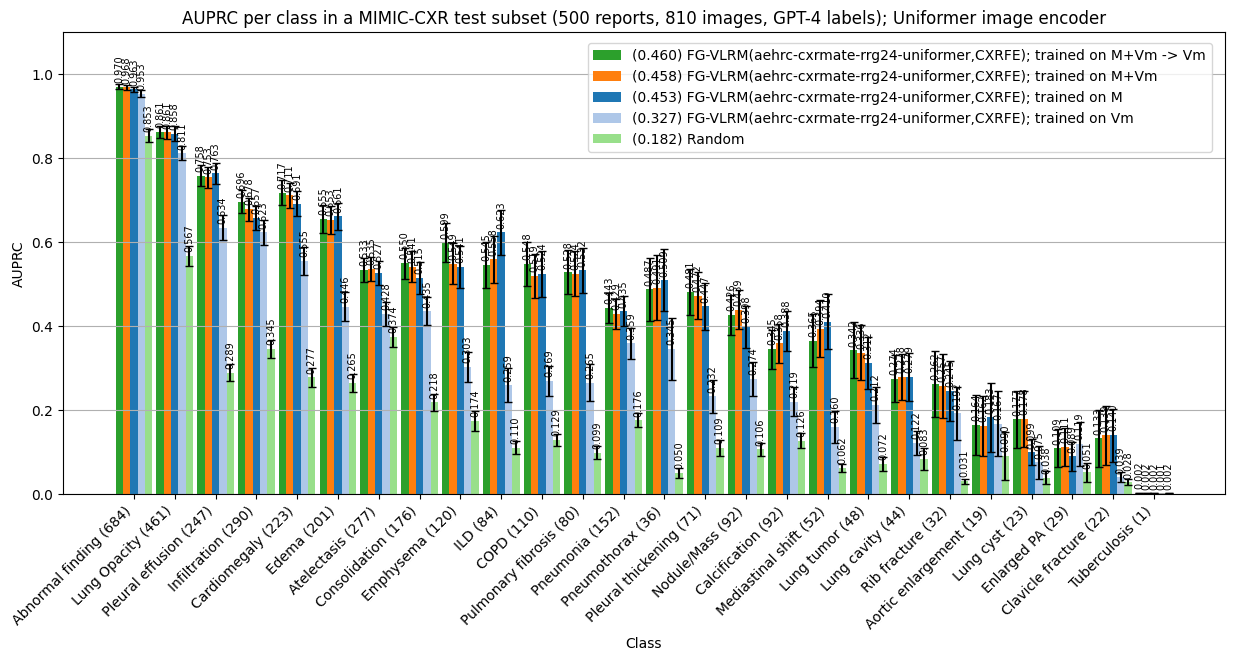

In [420]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC per class in a MIMIC-CXR test subset (500 reports, 810 images, GPT-4 labels); Uniformer image encoder',
    vertical=True,
    show_std=True,
    xtick_rotation=45,
    bbox_to_anchor=(0.72, 0.74),
    figsize=(15, 6),
    xlabel='Class',
    ylabel='AUPRC',
    ylim=[0, 1.1],
)

# 4) MIMIC-CXR test set: bar chart with AUPRC per class, Uniformer vs. RadDINO-MAIRA-2 vs. ConvNeXT vs. Random

In [545]:
mimiccxr_test_dicom_id_to_labels = load_pickle("/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr/mimiccxr_gpt4_test_labels(vindrcxr,gpt-4-1106-preview,nc=26,nd=810)(hash=312,2283394289643432387).pkl")

In [546]:
mimiccxr_test_dicom_id_to_labels.keys()

dict_keys(['dicom_id_to_labels', 'label_names'])

In [547]:
method_dicts = []
method_aliases = []
metric_names = mimiccxr_test_dicom_id_to_labels['label_names']

In [548]:
label_matrix = np.array([x for x in mimiccxr_test_dicom_id_to_labels['dicom_id_to_labels'].values()])
label_matrix.shape

(810, 26)

In [549]:
mimiccxr_label_frequencies = label_matrix.sum(0)

In [550]:
metric_aliases = [f'{x} ({mimiccxr_label_frequencies[i]})' for i, x in enumerate(metric_names)]
metric_aliases

['Aortic enlargement (19)',
 'Atelectasis (277)',
 'Calcification (92)',
 'Cardiomegaly (223)',
 'Clavicle fracture (22)',
 'Consolidation (176)',
 'Edema (201)',
 'Emphysema (120)',
 'Enlarged PA (29)',
 'ILD (84)',
 'Infiltration (290)',
 'Lung Opacity (461)',
 'Lung cavity (44)',
 'Lung cyst (23)',
 'Mediastinal shift (52)',
 'Nodule/Mass (92)',
 'Pleural effusion (247)',
 'Pleural thickening (71)',
 'Pneumothorax (36)',
 'Pulmonary fibrosis (80)',
 'Rib fracture (32)',
 'COPD (110)',
 'Lung tumor (48)',
 'Pneumonia (152)',
 'Tuberculosis (1)',
 'Abnormal finding (684)']

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [551]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,2354284722155721559).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [552]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; MIMIC-CXR (pos-neg-facts+GPT-4 labels)')
method_aliases.append('FG-VLM(Uniformer,CXRFE); trained on M+V$_\mathrm{m}$ → V$_\mathrm{m}$')

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [553]:
# tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=849,4157786131373039536).pkl')
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=839,2387084875718317333).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [554]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; MIMIC-CXR + VinDr-CXR modified')
# method_aliases.append('FG-VLM(RAD-DINO-MAIRA-2,CXRFE); trained on M+V$_\mathrm{m}$')
method_aliases.append('FG-VLM(RAD-DINO-MAIRA-2,CXRFE); trained on M+V$_\mathrm{m}$ → V$_\mathrm{m}$')

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [555]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=828,1087646721281355566).pkl')
tmp.keys()

dict_keys(['val_results', 'test_results', 'val_test_metrics', 'test_metrics', 'label_names', 'mimiccxr_val_dicom_id_to_labels_filepath', 'mimiccxr_test_dicom_id_to_labels_filepath', 'phrase_embeddings_filepath'])

In [556]:
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['test_metrics']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
# method_aliases.append('aehrc-cxrmate-rrg24-uniformer+CXRFE+FiLM-att+BBox+MLP; VinDr-CXR modified')
method_aliases.append('FG-VLM(ConvNeXT-small,CXRFE); trained on M')

#### Random

In [584]:
from medvqa.evaluation.bootstrapping import stratified_multilabel_bootstrap_metrics
from medvqa.metrics.classification.prc_auc import prc_auc_score

In [585]:
random_probs = np.random.rand(*label_matrix.shape)
print(random_probs.shape)

(810, 26)


In [586]:
random_metrics = stratified_multilabel_bootstrap_metrics(label_matrix, random_probs, prc_auc_score)

Bootstrapping: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 54.67it/s]


In [587]:
method_dict = {}
for label_name, mean, std in zip(metric_names, random_metrics['mean_per_class'], random_metrics['std_per_class']):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('Random')

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/auprc_per_class_mimiccxr_test_set_gpt4_labels.pdf


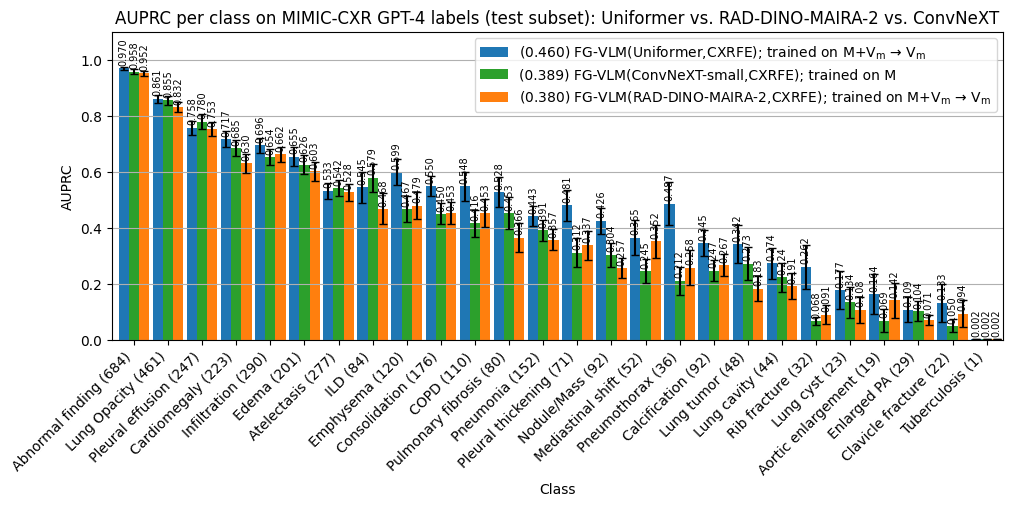

In [559]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC per class on MIMIC-CXR GPT-4 labels (test subset): Uniformer vs. RAD-DINO-MAIRA-2 vs. ConvNeXT',
    vertical=True,
    show_std=True,
    xtick_rotation=45,
#     bbox_to_anchor=(0.72, 0.77),
#     figsize=(15, 5),
#     xlabel='Class',
#     ylabel='AUPRC',
#     ylim=[0, 1.1],
    bbox_to_anchor=(0.7, 0.74),
    figsize=(11.5, 4),
    xlabel='Class',
    ylabel='AUPRC',
    ylim=[0, 1.1],
    xlim=[0.025, 1.03],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/auprc_per_class_mimiccxr_test_set_gpt4_labels.pdf',
)

# 5) MIMIC-CXR & VinDr-CXR: multiple models and settings

In [509]:
def get_method_dict(facts_results_path, gpt4_results_path, vindrcxr_results_path):
    output = dict()
    
    # MIMIC-CXR facts
    tmp = load_pickle(facts_results_path)
    
    key = 'AUROC micro avg (MIMIC-CXR facts)'
    output[key] = tmp['rocauc_with_bootstrapping']['mean']
    output[f'{key}_std'] = tmp['rocauc_with_bootstrapping']['std']

    key = 'AUPRC micro avg (MIMIC-CXR facts)'
    output[key] = tmp['prcauc_with_bootstrapping']['mean']
    output[f'{key}_std'] = tmp['prcauc_with_bootstrapping']['std']

    # GPT-4
    tmp = load_pickle(gpt4_results_path)

    key = 'AUPRC micro avg (MIMIC-CXR GPT-4 labels)'
    output[key] = tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_micro_avg']
    output[f'{key}_std'] = tmp['test_metrics']['prc_auc_with_bootstrapping']['std_micro_avg']

    key = 'AUPRC macro avg (MIMIC-CXR GPT-4 labels)'
    output[key] = tmp['test_metrics']['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['test_metrics']['prc_auc_with_bootstrapping']['std_macro_avg']

    # VinDr-CXR
    tmp = load_pickle(vindrcxr_results_path)

    key = 'AUPRC macro avg (VinDr-CXR)'
    output[key] = tmp['classification']['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['classification']['prc_auc_with_bootstrapping']['std_macro_avg']

    for x in ('bbox_regression', 'detection'): # for backward compatibility
        
        if x in tmp: # Some methods do not support object detection

            key = 'IoU micro avg (VinDr-CXR)'
            output[key] = tmp[x]['metrics_with_bootstrapping']['micro_iou']['mean']
            output[f'{key}_std'] = tmp[x]['metrics_with_bootstrapping']['micro_iou']['std']

            key = 'mAP macro avg (VinDr-CXR)'
            output[key] = tmp[x]['metrics_with_bootstrapping']['chex_mAP']['mean']
            output[f'{key}_std'] = tmp[x]['metrics_with_bootstrapping']['chex_mAP']['std']
            
            break
            
    return output

In [510]:
metric_names = [
#     'AUROC micro avg (MIMIC-CXR facts)',
#     'AUPRC micro avg (MIMIC-CXR facts)',
#     'AUPRC micro avg (MIMIC-CXR GPT-4 labels)',
    'AUPRC macro avg (MIMIC-CXR GPT-4 labels)',
    'AUPRC macro avg (VinDr-CXR)',
#     'IoU micro avg (VinDr-CXR)',
    'mAP macro avg (VinDr-CXR)',
]
metric_aliases = [
#     '$\mathbf{Classification}$\nAUROC micro\nMIMIC-CXR facts',
#     '$\mathbf{Classification}$\nAUPRC micro\nMIMIC-CXR facts',
#     '$\mathbf{Classification}$\nAUPRC micro\nMIMIC-CXR GPT-4\nlabels',
    '$\mathbf{Classif.}$\nAUPRC\nM (GPT-4 labels)',
    '$\mathbf{Classif.}$\nAUPRC\nV$_{\mathrm{m}}$\n',
#     '$\mathbf{Detection}$\nIoU micro\nVinDr-CXR$_{\mathrm{m}}$',
    '$\mathbf{Detection}$\nmAP@[0.1-0.7]\nV$_{\mathrm{m}}$ (15 classes)',
]

## 5.1) Uniformer

In [511]:
method_dicts = []
method_aliases = []

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP; VinDr-CXR modified

In [512]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=481,1036886160322421723).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,648207743534836647).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE); tr: V$_{\mathrm{m}}$')
# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	VinDr-CXR modified
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=481,1036886160322421723).pkl
# # gpt4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,648207743534836647).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [513]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=469,4131332276991725057).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=830,2354823452357530703).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE); tr: M')
# aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=469,4131332276991725057).pkl
# # gpt4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=830,2354823452357530703).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250206_105410_mim-facts_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [514]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=491,1758763123808136886).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=852,3238565767862526965).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.30),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE); tr: M+V$_{\mathrm{m}}$')
# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=491,1758763123808136886).pkl
# # gpt4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=852,3238565767862526965).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_005354_mim-facts+vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.30),use_classifier_confs).pkl

#### aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [515]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=481,3693363221114126387).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,2354284722155721559).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.30),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE); tr: M+V$_{\mathrm{m}}$ → V$_{\mathrm{m}}$')
# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=481,3693363221114126387).pkl
# # gpt4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=842,2354284722155721559).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_111607_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.30),use_classifier_confs).pkl

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_uniformer__simplified.pdf


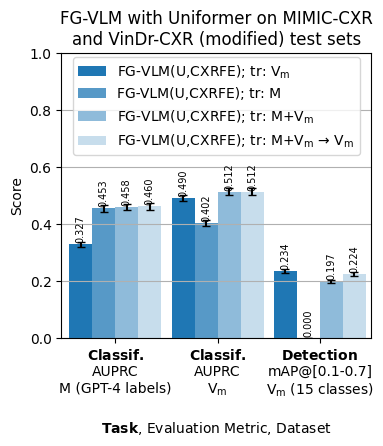

In [331]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='FG-VLM with Uniformer on MIMIC-CXR\nand VinDr-CXR (modified) test sets',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
    bbox_to_anchor=(0.5, 0.64),
    figsize=(4., 3.7),
    xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
    ylabel='Score',
    sort_methods=False,
    sort_metrics=False,
    prepend_mean_score_to_legend=False,
    ylim=[0, 1],
    xlim=[0.27, 1.28],
    colors=generate_color_variants(_COLORS[0], 5),
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_uniformer__simplified.pdf'
)

In [521]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [522]:
from medvqa.evaluation.plots import plot_barchart

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr_fact_classif_auprc_uniformer.pdf


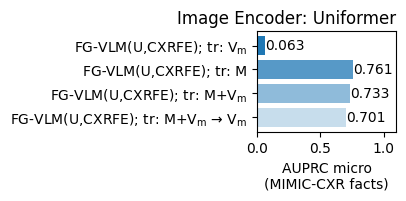

In [529]:
plot_barchart(
    values=[md['AUPRC micro avg (MIMIC-CXR facts)'] for md in method_dicts][::-1],
#     show_stddev=True,
#     stddevs=[md['AUPRC micro avg (MIMIC-CXR facts)_std'] for md in method_dicts],
    bar_names=method_aliases[::-1],
    color=generate_color_variants(_COLORS[0], 5)[:4][::-1],
    title='Image Encoder: Uniformer',
    title_loc='right',
    xlabel='AUPRC micro\n(MIMIC-CXR facts)',
    ylabel=None,
    horizontal=True,
    write_values_on_bars=True,
    figsize=(1.8,1.3),
#     sort_values=True,
    xlim=[0, 1.1],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr_fact_classif_auprc_uniformer.pdf',
)

## 5.2) RAD-DINO-MAIRA-2

In [530]:
method_dicts = []
method_aliases = []

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	VinDr-CXR modified

In [531]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=478,3951371712062138910).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=839,1718039871180471797).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.10),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE); tr: V$_{\mathrm{m}}$')

# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	VinDr-CXR modified

# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=478,3951371712062138910).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=839,1718039871180471797).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.10),use_classifier_confs).pkl

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [532]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=466,2934004856412309289).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=827,187894979722230286).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE); tr: M')

# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=466,2934004856412309289).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=827,187894979722230286).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_195417_mim-facts_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [533]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=488,975694747828227220).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=849,4157786131373039536).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.10),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE); tr: M+V$_{\mathrm{m}}$')

# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=488,975694747828227220).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=849,4157786131373039536).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250210_234947_mim-facts+vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.10),use_classifier_confs).pkl

#### microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [534]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=478,3268909973688853736).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=839,2387084875718317333).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE); tr: M+V$_{\mathrm{m}}$ → V$_{\mathrm{m}}$')

# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=478,3268909973688853736).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=839,2387084875718317333).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_080237_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_rad-dino-maira-2__simplified.pdf


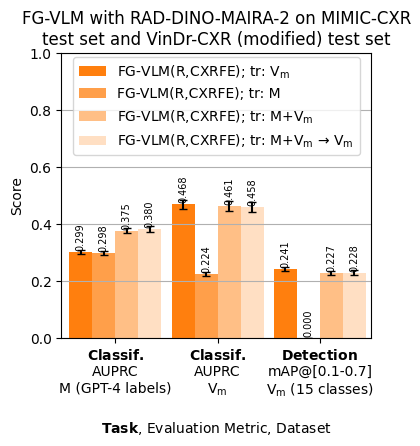

In [460]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='FG-VLM with RAD-DINO-MAIRA-2 on MIMIC-CXR\ntest set and VinDr-CXR (modified) test set',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
#     bbox_to_anchor=(0.76, 0.65),
#     figsize=(13, 4),
#     xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
#     ylabel='Score',
#     sort_methods=False,
#     sort_metrics=False,
#     prepend_mean_score_to_legend=False,
#     ylim=[0, 1.1],
    
#     bbox_to_anchor=(0.5, 0.64),
#     figsize=(4.2, 3.7),
#     xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
#     ylabel='Score',
#     sort_methods=False,
#     sort_metrics=False,
#     prepend_mean_score_to_legend=False,
#     ylim=[0, 1],
    
    bbox_to_anchor=(0.5, 0.64),
    figsize=(4., 3.7),
    xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
    ylabel='Score',
    sort_methods=False,
    sort_metrics=False,
    prepend_mean_score_to_legend=False,
    ylim=[0, 1],
    xlim=[0.27, 1.28],
    
    
    colors=generate_color_variants(_COLORS[1], 5),
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_rad-dino-maira-2__simplified.pdf'
)

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr_fact_classif_auprc_rad-dino-maira-2.pdf


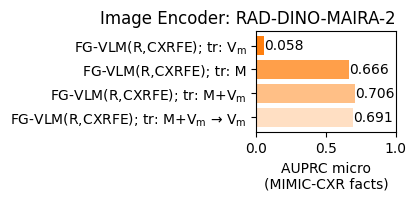

In [537]:
plot_barchart(
    values=[md['AUPRC micro avg (MIMIC-CXR facts)'] for md in method_dicts][::-1],
#     show_stddev=True,
#     stddevs=[md['AUPRC micro avg (MIMIC-CXR facts)_std'] for md in method_dicts],
    bar_names=method_aliases[::-1],
    color=generate_color_variants(_COLORS[1], 5)[:4][::-1],
    title='Image Encoder: RAD-DINO-MAIRA-2',
    title_loc='right',
    xlabel='AUPRC micro\n(MIMIC-CXR facts)',
    ylabel=None,
    horizontal=True,
    write_values_on_bars=True,
#     figsize=(2,1.5),
# #     sort_values=True,
#     xlim=[0, 1],
    figsize=(1.8,1.3),
#     sort_values=True,
    xlim=[0, 1],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr_fact_classif_auprc_rad-dino-maira-2.pdf',
)

## 5.3) ConvNeXT

In [538]:
method_dicts = []
method_aliases = []

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	VinDr-CXR modified

In [539]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=479,735370341869859442).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=840,758072152554157023).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.20),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE); tr: V$_{\mathrm{m}}$')


# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	VinDr-CXR modified
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)

# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=479,735370341869859442).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=840,758072152554157023).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.20),use_classifier_confs).pkl

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)

In [540]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=467,131648998819450273).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=828,1087646721281355566).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE); tr: M')

# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)

# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=467,131648998819450273).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=828,1087646721281355566).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_042300_mim-facts_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)

In [541]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=489,674845710000613960).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=850,1572529429195743983).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.20),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE); tr: M+V$_{\mathrm{m}}$')

# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)

# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=489,674845710000613960).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=850,1572529429195743983).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_050157_mim-facts+vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.20),use_classifier_confs).pkl

#### ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified

In [542]:
method_dict = get_method_dict(
    facts_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=479,3750999913034163109).pkl",
    gpt4_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=840,4183558490500441618).pkl",
    vindrcxr_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl",
)
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE); tr: M+V$_{\mathrm{m}}$ → V$_{\mathrm{m}}$')

# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP	MIMIC-CXR (pos-neg-facts v2.0 + GPT-4 labels) (0.8) + VinDr-CXR modified (0.2) -> VinDr-CXR modified
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)

# # facts
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_test_set_fact_ranking(nres=4551)(hash=479,3750999913034163109).pkl
# # gpt-4
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/mimiccxr_val_test_sets_fact_classification(nres=1387,nval=577,ntest=810,nlabels=26)(hash=840,4183558490500441618).pkl
# # vinbig mod
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_145548_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_convnext-small__simplified.pdf


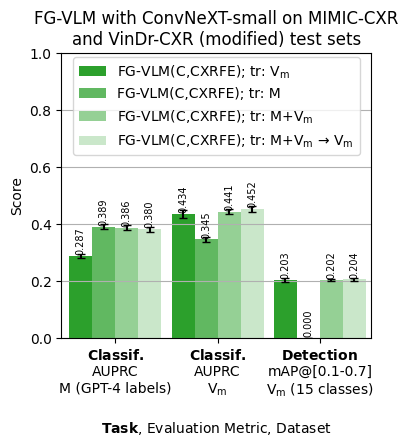

In [347]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='FG-VLM with ConvNeXT-small on MIMIC-CXR\nand VinDr-CXR (modified) test sets',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
    
#     bbox_to_anchor=(0.5, 0.64),
#     figsize=(4.2, 3.7),
#     xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
#     ylabel='Score',
#     sort_methods=False,
#     sort_metrics=False,
#     prepend_mean_score_to_legend=False,
#     ylim=[0, 1],
    
    bbox_to_anchor=(0.5, 0.64),
    figsize=(4., 3.7),
    xlabel='$\mathbf{Task}$, Evaluation Metric, Dataset',
    ylabel='Score',
    sort_methods=False,
    sort_metrics=False,
    prepend_mean_score_to_legend=False,
    ylim=[0, 1],
    xlim=[0.27, 1.28],
    
    colors=generate_color_variants(_COLORS[2], 5),
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr+vindrcxr(modified)_metrics_convnext-small__simplified.pdf'
)

Saved the plot as a PDF file: /home/pamessina/figures/mimiccxr_fact_classif_auprc_convnext.pdf


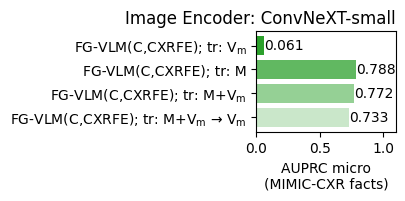

In [544]:
plot_barchart(
    values=[md['AUPRC micro avg (MIMIC-CXR facts)'] for md in method_dicts][::-1],
#     show_stddev=True,
#     stddevs=[md['AUPRC micro avg (MIMIC-CXR facts)_std'] for md in method_dicts],
    bar_names=method_aliases[::-1],
    color=generate_color_variants(_COLORS[2], 5)[:4][::-1],
    title='Image Encoder: ConvNeXT-small',
    title_loc='right',
    xlabel='AUPRC micro\n(MIMIC-CXR facts)',
    ylabel=None,
    horizontal=True,
    write_values_on_bars=True,
#     figsize=(2,1.5),
# #     sort_values=True,
#     xlim=[0, 1],
    figsize=(1.8,1.3),
#     sort_values=True,
    xlim=[0, 1.1],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/mimiccxr_fact_classif_auprc_convnext.pdf',
)

# 6) VinDr-CXR: Ablation experiments

## 6.1) Classification

In [4]:
def get_method_dict(full_model_results_path, random_fact_model_results_path,
                    no_grounding_model_results_path, linear_head_model_results_path):
    output = dict()
    
    # Full model
    tmp = load_pickle(full_model_results_path)
    key = 'FG-VLRM with CXRFE'
    output[key] = tmp['classification']['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['classification']['prc_auc_with_bootstrapping']['std_macro_avg']
    
    # With random facts
    tmp = load_pickle(random_fact_model_results_path)
    key = 'FG-VLRM with random facts'
    output[key] = tmp['classification']['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['classification']['prc_auc_with_bootstrapping']['std_macro_avg']
    
    # Without grounding
    tmp = load_pickle(no_grounding_model_results_path)
    key = 'FG-VLRM without detection'
    output[key] = tmp['classification']['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['classification']['prc_auc_with_bootstrapping']['std_macro_avg']
    
    # Linear head
    tmp = load_pickle(linear_head_model_results_path)
    key = 'Image encoder + linear head'
    output[key] = tmp['prc_auc_with_bootstrapping']['mean_macro_avg']
    output[f'{key}_std'] = tmp['prc_auc_with_bootstrapping']['std_macro_avg']
            
    return output

In [10]:
metric_names = [
    'Image encoder + linear head',
    'FG-VLRM without detection',
    'FG-VLRM with CXRFE',
#     'FG-VLRM with random facts',
    
    
]
metric_aliases = [
    'Image encoder\n+ linear head',
    'FG-VLM w/o\ngrounding supervision',
    'FG-VLM',
#     'FG-VLRM with\nrandom vectors',
]

In [11]:
method_dicts = []
method_aliases = []

#### aehrc-cxrmate-rrg24-uniformer

In [12]:
method_dict = get_method_dict(
    full_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl",
    random_fact_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl",
    no_grounding_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_133521_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
    linear_head_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250217_152002_vinbig_aehrc-cxrmate-rrg24-uniformer/vinbig_test_set_multilabel_classification_metrics.pkl",
)
method_dicts.append(method_dict)
method_aliases.append('Image encoder: Uniformer')

# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl

# # aehrc-cxrmate-rrg24-uniformer + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl

# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + MLP (no grounding)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_133521_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_133521_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

# # aehrc-cxrmate-rrg24-uniformer + Linear Head
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20250217_152002_vinbig_aehrc-cxrmate-rrg24-uniformer
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250217_152002_vinbig_aehrc-cxrmate-rrg24-uniformer/vinbig_test_set_multilabel_classification_metrics.pkl

#### microsoft-rad-dino-maira-2

In [13]:
method_dict = get_method_dict(
    full_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl",
    random_fact_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl",
    no_grounding_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_160741_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
    linear_head_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250217_164034_vinbig_microsoft-rad-dino-maira-2/vinbig_test_set_multilabel_classification_metrics.pkl",
)
method_dicts.append(method_dict)
method_aliases.append('Image encoder: RAD-DINO-MAIRA-2')

# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl

# # microsoft-rad-dino-maira-2  + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

# # microsoft-rad-dino-maira-2  + CXRFE + FiLM Attention Pooling + MLP (no grounding)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_160741_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_160741_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

# # microsoft-rad-dino-maira-2 + Linear Head
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20250217_164034_vinbig_microsoft-rad-dino-maira-2
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250217_164034_vinbig_microsoft-rad-dino-maira-2/vinbig_test_set_multilabel_classification_metrics.pkl

#### ConvNeXT-small

In [14]:
method_dict = get_method_dict(
    full_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl",
    random_fact_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl",
    no_grounding_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225926_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl",
    linear_head_model_results_path="/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250212_173558_vinbig_facebook-convnext-small-224/vinbig_test_set_multilabel_classification_metrics.pkl",
)
method_dicts.append(method_dict)
method_aliases.append('Image encoder: ConvNeXT-small')

# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

# # ConvNext  + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

# # ConvNext + CXRFE + FiLM Attention Pooling + MLP (no grounding)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_225926_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225926_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

# # ConvNext + Linear Head
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20250212_173558_vinbig_facebook-convnext-small-224
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250212_173558_vinbig_facebook-convnext-small-224/vinbig_test_set_multilabel_classification_metrics.pkl


### Plot

Saved the plot as a PDF file: /home/pamessina/figures/auprc_macro_per_image_encoder_and_architecture_vindrcxr_test_set__random_removed.pdf


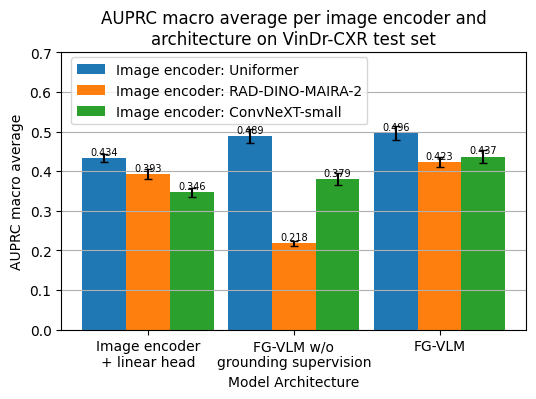

In [19]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC macro average per image encoder and\narchitecture on VinDr-CXR test set',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
    bbox_to_anchor=(0.34, 0.74),
    figsize=(6, 3*1.2),
    xlabel='Model Architecture',
    ylabel='AUPRC macro average',
    sort_methods=False,
    sort_metrics=False,
    prepend_mean_score_to_legend=False,
    ylim=[0, 0.7],
    vertical_score_text_rotation=0,
    save_as_pdf=True,
#     save_path='/home/pamessina/figures/auprc_macro_per_image_encoder_and_architecture_vindrcxr_test_set.pdf',
    save_path='/home/pamessina/figures/auprc_macro_per_image_encoder_and_architecture_vindrcxr_test_set__random_removed.pdf',
)

## 6.2) Detection

In [20]:
def get_method_dict(results_path):
    output = dict()
    
    tmp = load_pickle(results_path)
    
    for x in ('bbox_regression', 'detection'): # backward compatibility
        
        if x in tmp:

            key = 'IoU micro avg'
            output[key] = tmp[x]['metrics_with_bootstrapping']['micro_iou']['mean']
            output[f'{key}_std'] = tmp[x]['metrics_with_bootstrapping']['micro_iou']['std']

            key = 'mAP macro avg'
            output[key] = tmp[x]['metrics_with_bootstrapping']['chex_mAP']['mean']
            output[f'{key}_std'] = tmp[x]['metrics_with_bootstrapping']['chex_mAP']['std']
        
            break
            
    return output

In [21]:
metric_names = [
#     'IoU micro avg',
    'mAP macro avg',
]
metric_aliases = [
#     'IoU micro',
#     'mAP@[0.1-0.7] macro\n(15 classes)',
    '',
]

In [22]:
method_dicts = []
method_aliases = []

#### aehrc-cxrmate-rrg24-uniformer

In [23]:
method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl")
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(Uniformer,CXRFE)')

# method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl")
# method_dicts.append(method_dict)
# method_aliases.append('FG-VLRM(Uniformer,random)')




# # aehrc-cxrmate-rrg24-uniformer + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl

# # aehrc-cxrmate-rrg24-uniformer + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_151305_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.10,0.10),use_classifier_confs).pkl

#### microsoft-rad-dino-maira-2

In [24]:
method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl")
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(RAD-DINO-MAIRA-2,CXRFE)')

# method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl")
# method_dicts.append(method_dict)
# method_aliases.append('FG-VLRM(RAD-DINO-MAIRA-2,random)')




# # microsoft-rad-dino-maira-2 + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl

# # microsoft-rad-dino-maira-2  + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_172952_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

#### ConvNeXT-small

In [25]:
method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl")
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(ConvNeXT-small,CXRFE)')

# method_dict = get_method_dict("/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl")
# method_dicts.append(method_dict)
# method_aliases.append('FG-VLRM(ConvNeXT-small,random)')




# # ConvNext + CXRFE + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

# # ConvNext  + random fact embeddings + FiLM Attention Pooling + BBox + MLP
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225224_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl

# # ConvNext + CXRFE + FiLM Attention Pooling + MLP (no grounding)
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20250212_225926_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_225926_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP,128,256,256-128)/vindrcxr_metrics(classification,3000).pkl

# # ConvNext + Linear Head
# /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20250212_173558_vinbig_facebook-convnext-small-224
# /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250212_173558_vinbig_facebook-convnext-small-224/vinbig_test_set_multilabel_classification_metrics.pkl


### Plot

Saved the plot as a PDF file: /home/pamessina/figures/detection_metrics_vindrcxr_test_set__random_and_iou_removed.pdf


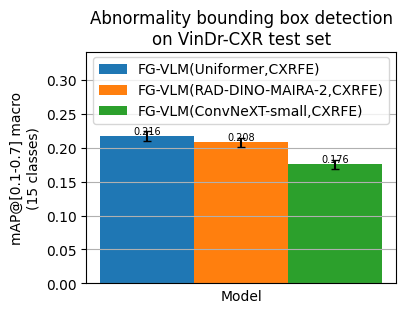

In [33]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='Abnormality bounding box detection\non VinDr-CXR test set',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
    bbox_to_anchor=(0.5, 0.69),
    figsize=(4, 3),
    xlabel='Model',
    ylabel='mAP@[0.1-0.7] macro\n(15 classes)',
    sort_methods=False,
    sort_metrics=False,
    prepend_mean_score_to_legend=False,
    vertical_score_text_rotation=0,
    ylim=[0, 0.34],
    hide_xticks=True,
    save_as_pdf=True,
    save_path='/home/pamessina/figures/detection_metrics_vindrcxr_test_set__random_and_iou_removed.pdf',
)

# 7) VinDr-CXR test set (original labels): bar chart with AUPRC per class, Uniformer vs. RadDINO-MAIRA-2 vs. ConvNeXT

In [285]:
method_dicts = []
method_aliases = []
metric_names = VINBIG_LABELS[:]
metric_names.remove('Edema')

In [286]:
metric_aliases = [f'{x} (tr:{label_frequencies_normal["train"][x]}, ts:{label_frequencies_normal["test"][x]})' for x in metric_names]
class_name = 'Lung Opacity'
class_idx = metric_names.index(class_name)
a = label_frequencies_normal["train"][class_name]
b = label_frequencies_normal["test"][class_name]
metric_aliases[class_idx] = f'{class_name} (tr:{a}, ts:{b})'

#### aehrc-cxrmate-rrg24-uniformer

In [287]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl')
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(Uniformer,CXRFE)')

#### RAD-DINO-MAIRA-2

In [288]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl')
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(RAD-DINO-MAIRA-2,CXRFE)')

#### ConvNeXT-small

In [289]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl')
method_dict = {}
for label_name, mean, std in zip(
    tmp['classification']['classification_label_names'],
    tmp['classification']['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['classification']['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(ConvNeXT-small,CXRFE)')

#### RAD-DINO-MAIRA-2 (linear head)

In [290]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20250217_164034_vinbig_microsoft-rad-dino-maira-2/vinbig_test_set_multilabel_classification_metrics.pkl')
method_dict = {}
for label_name, mean, std in zip(
    tmp['label_names'],
    tmp['prc_auc_with_bootstrapping']['mean_per_class'],
    tmp['prc_auc_with_bootstrapping']['std_per_class'],
):
    method_dict[label_name] = mean
    method_dict[f'{label_name}_std'] = std
method_dicts.append(method_dict)
method_aliases.append('RAD-DINO-MAIRA-2 + Linear Head')

### Plot

Saved the plot as a PDF file: /home/pamessina/figures/auprc_per_class_vindrcxr(original)_test_set.pdf


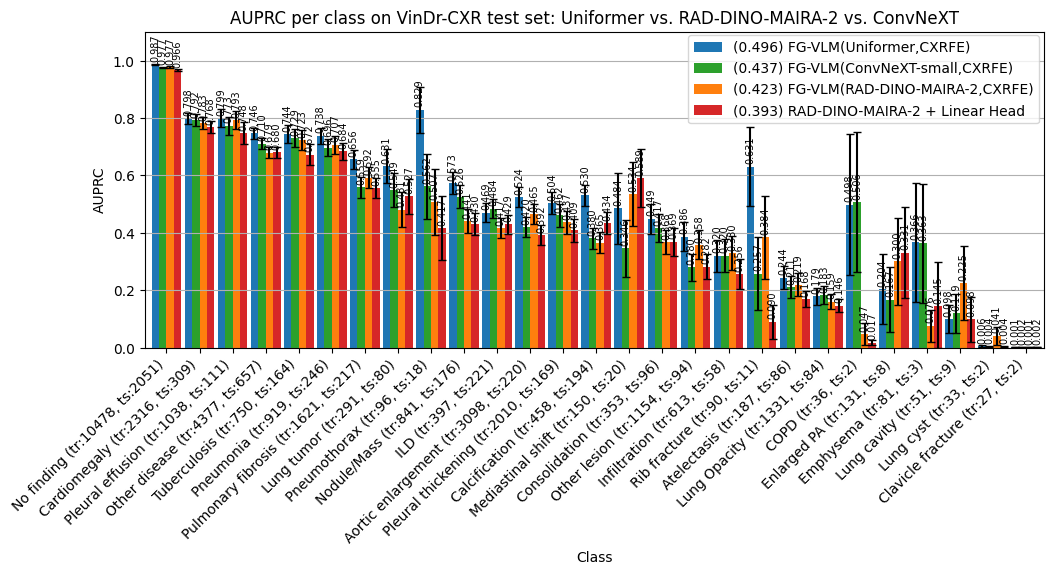

In [306]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='AUPRC per class on VinDr-CXR test set: Uniformer vs. RAD-DINO-MAIRA-2 vs. ConvNeXT',
    vertical=True,
    show_std=True,
    xtick_rotation=45,
    bbox_to_anchor=(0.8, 0.71),
    figsize=(11.6, 4.1),
    xlabel='Class',
    ylabel='AUPRC',
    ylim=[0, 1.1],
    xlim=[0.025, 1.032],
    save_as_pdf=True,
    save_path='/home/pamessina/figures/auprc_per_class_vindrcxr(original)_test_set.pdf',
)

In [195]:
from medvqa.datasets.vinbig import load_labels, VINBIG_LABELS

In [196]:
train_image_id_2_labels, test_image_id_2_labels = load_labels()

In [197]:
def get_mean_std_of_class_pos_probs(class_name, results_path, test_image_id_2_labels):
    tmp = load_pickle(results_path)
    class_idx = tmp['classification']['classification_label_names'].index(class_name)
    class_probs = tmp['classification']['pred_probs'][:, class_idx]
    
    class_pos_idxs = []
    class_idx = VINBIG_LABELS.index(class_name)
    for i, image_path in enumerate(tmp['image_paths']):
        image_id = image_path.split('/')[-1].split('.')[0]
        labels = test_image_id_2_labels[image_id]
        if labels[class_idx] == 1:
            class_pos_idxs.append(i)
    print(len(class_pos_idxs))

    class_pos_probs = class_probs[class_pos_idxs]
    class_pos_probs_normalized = (class_pos_probs - class_pos_probs.min()) / (class_pos_probs.max() - class_pos_probs.min())
    mean = class_pos_probs_normalized.mean()
    std = class_pos_probs_normalized.std()

    return mean, std

In [198]:
def get_method_dict(class_name, original_results_path, modified_results_path):
    output = dict()
    
    key = f'{class_name} (original)'
    mean, std = get_mean_std_of_class_pos_probs(class_name=class_name,
                               results_path=original_results_path,
                               test_image_id_2_labels=test_image_id_2_labels)
    output[key] = mean
    output[f'{key}_std'] = std
    
    key = f'{class_name} (modified)'
    mean, std = get_mean_std_of_class_pos_probs(class_name=class_name,
                               results_path=modified_results_path,
                               test_image_id_2_labels=test_image_id_2_labels)
    output[key] = mean
    output[f'{key}_std'] = std    
    
    return output

In [199]:
method_dicts = []
method_aliases = []

In [200]:
metric_names = [
    'Lung Opacity (original)',
    'Lung Opacity (modified)',
]
metric_aliases = [
    'Original',
    'Modified',
]

In [201]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE)')

84
84


In [202]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.10),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE)')

84
84


In [203]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.20),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE)')

84
84


Saved the plot as a PDF file: /home/pamessina/figures/lung_opacity_probability_before_after.pdf


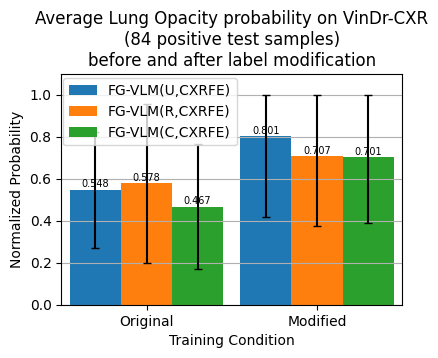

In [205]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='Average Lung Opacity probability on VinDr-CXR\n(84 positive test samples)\nbefore and after label modification',
    vertical=True,
    show_std=True,
    xtick_rotation=0,
    xtick_ha='center',
    bbox_to_anchor=(0.26, 0.69),
    figsize=(4.4, 3),
    xlabel='Training Condition',
    ylabel='Normalized Probability',
    ylim=[0, 1.1],
    xlim=[0.4, 1.4],
    prepend_mean_score_to_legend=False,
    sort_methods=False,
    sort_metrics=False,
    vertical_score_text_rotation=0,
    save_as_pdf=True,
    save_path='/home/pamessina/figures/lung_opacity_probability_before_after.pdf',
)

In [500]:
def get_recall(class_name, results_path, test_image_id_2_labels):
    tmp = load_pickle(results_path)
    class_idx = tmp['classification']['classification_label_names'].index(class_name)
    class_probs = tmp['classification']['pred_probs'][:, class_idx]
    
    class_pos_idxs = []
    class_idx = VINBIG_LABELS.index(class_name)
    for i, image_path in enumerate(tmp['image_paths']):
        image_id = image_path.split('/')[-1].split('.')[0]
        labels = test_image_id_2_labels[image_id]
        if labels[class_idx] == 1:
            class_pos_idxs.append(i)
    print(len(class_pos_idxs))

    class_pos_probs = class_probs[class_pos_idxs]
    class_pos_probs_normalized = (class_pos_probs - class_pos_probs.min()) / (class_pos_probs.max() - class_pos_probs.min())
    
    return (class_pos_probs_normalized >= 0.5).sum() / len(class_pos_probs_normalized)

In [501]:
def get_method_dict(class_name, original_results_path, modified_results_path):
    output = dict()
    
    key = f'{class_name} (original)'
    recall = get_recall(class_name=class_name,
                           results_path=original_results_path,
                           test_image_id_2_labels=test_image_id_2_labels)
    output[key] = recall
    
    key = f'{class_name} (modified)'
    recall = get_recall(class_name=class_name,
                           results_path=modified_results_path,
                           test_image_id_2_labels=test_image_id_2_labels)
    output[key] = recall
    
    return output

In [502]:
method_dicts = []
method_aliases = []

In [503]:
metric_names = [
    'Lung Opacity (original)',
    'Lung Opacity (modified)',
]
metric_aliases = [
    'Original',
    'Modified',
]

In [504]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_130409_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.05,0.50),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250203_061403_vinbig_PhraseGrounder(aehrc-cxrmate-rrg24-uniformer,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(U,CXRFE)')

84
84


In [505]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250217_155733_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.40,0.10),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_152817_vinbig_PhraseGrounder(microsoft-rad-dino-maira-2,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(bbox_regression,3000,opt_thr(0.50,0.10),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(R,CXRFE)')

84
84


In [506]:
method_dict = get_method_dict(class_name='Lung Opacity',
                              original_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250212_175945_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.30,0.10),use_classifier_confs).pkl',
                              modified_results_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20250215_012801_vinbig_PhraseGrounder(facebook-convnext-small-224,AdaptiveFiLM_MLP_BBoxRegression,128,256,256-128)/vindrcxr_metrics(detection,3000,opt_thr(0.20,0.20),use_classifier_confs).pkl',
                             )
method_dicts.append(method_dict)
method_aliases.append('FG-VLM(C,CXRFE)')

84
84


Saved the plot as a PDF file: /home/pamessina/figures/lung_opacity_recall_before_after.pdf


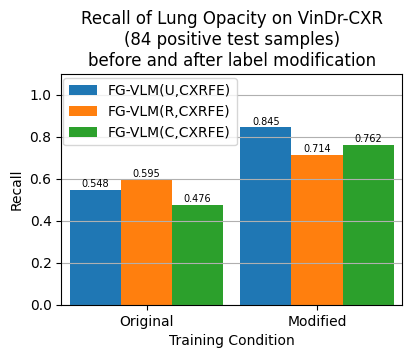

In [508]:
plot_metric_bars_per_method(
    method_dicts=method_dicts,
    method_aliases=method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='Recall of Lung Opacity on VinDr-CXR\n(84 positive test samples)\nbefore and after label modification',
    vertical=True,
    xtick_rotation=0,
    xtick_ha='center',
    bbox_to_anchor=(0.26, 0.69),
    figsize=(4.4, 3),
    xlabel='Training Condition',
    ylabel='Recall',
    ylim=[0, 1.1],
    xlim=[0.4, 1.4],
    prepend_mean_score_to_legend=False,
    sort_methods=False,
    sort_metrics=False,
    vertical_score_text_rotation=0,
    save_as_pdf=True,
    save_path='/home/pamessina/figures/lung_opacity_recall_before_after.pdf',
)